# Fashion MNIST

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices())

# tf.keras.utils.set_random_seed(812)
# tf.config.experimental.enable_op_determinism()
import gc
class FreeMemory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'epoch {epoch} ended, info: {logs}')
        tf.keras.backend.clear_session()
        gc.collect()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
PX_ROWS = 28
PX_COLS = 28
CLASSES_NUM = 10
EPOCHS_NUM = 10

from tensorflow.keras.optimizers import SGD, Adam
OPTIMIZER = lambda: Adam()
# OPTIMIZER = lambda: SGD(learning_rate=0.01, momentum=0.01)

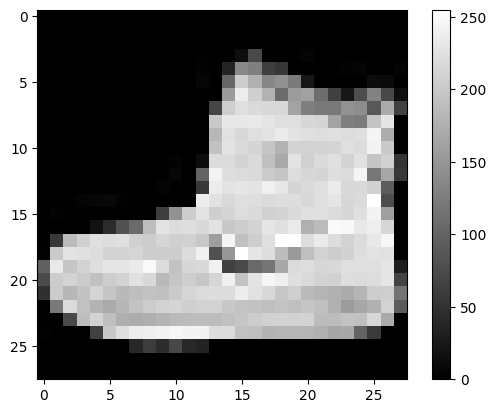

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

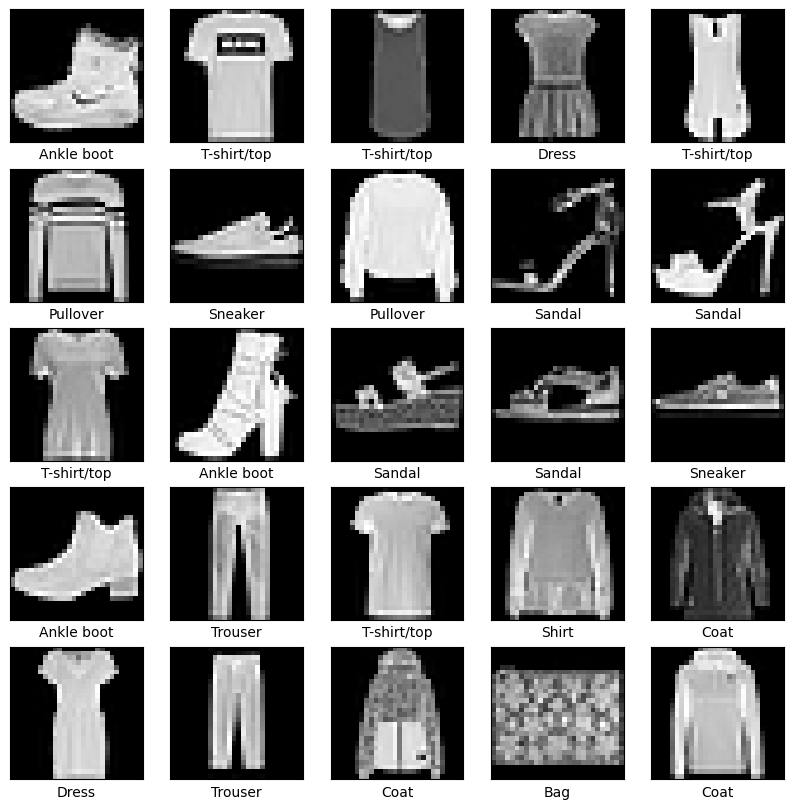

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## RVMLPNN

In [8]:
RVMLPNN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(PX_ROWS, PX_COLS,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-10-29 13:16:41.386378: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-29 13:16:41.386490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-29 13:16:41.386552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
RVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
RVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
RVMLPNN_history = RVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
RVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

2023-10-29 13:16:42.983449: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x9623360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-29 13:16:42.983463: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-10-29 13:16:42.995552: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-29 13:16:43.095102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-29 13:16:43.148449: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


epoch 0 ended, info: {'loss': 0.5000995397567749, 'accuracy': 0.8238999843597412, 'val_loss': 0.4303407371044159, 'val_accuracy': 0.8463000059127808}
epoch 1 ended, info: {'loss': 0.37547630071640015, 'accuracy': 0.8634833097457886, 'val_loss': 0.40991854667663574, 'val_accuracy': 0.847000002861023}
epoch 2 ended, info: {'loss': 0.3366859555244446, 'accuracy': 0.8775500059127808, 'val_loss': 0.38644030690193176, 'val_accuracy': 0.8596000075340271}
epoch 3 ended, info: {'loss': 0.3126227855682373, 'accuracy': 0.8858166933059692, 'val_loss': 0.35274845361709595, 'val_accuracy': 0.8737999796867371}
epoch 4 ended, info: {'loss': 0.2948566973209381, 'accuracy': 0.8924333453178406, 'val_loss': 0.3460718095302582, 'val_accuracy': 0.8744999766349792}
epoch 5 ended, info: {'loss': 0.2808226943016052, 'accuracy': 0.8969333171844482, 'val_loss': 0.3563125431537628, 'val_accuracy': 0.8705999851226807}
epoch 6 ended, info: {'loss': 0.2682134211063385, 'accuracy': 0.8999500274658203, 'val_loss': 0.3

[0.3268749415874481, 0.885200023651123]

## RVCNN

In [11]:
train_reshaped = train_images.reshape(train_images.shape[0], PX_COLS, PX_ROWS, 1)
test_reshaped = test_images.reshape(test_images.shape[0], PX_COLS, PX_ROWS, 1)

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

RVCNN_model = tf.keras.Sequential()
RVCNN_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(PX_ROWS, PX_COLS, 1))) 
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Flatten())
RVCNN_model.add(Dense(256, activation='relu'))
RVCNN_model.add(Dropout(0.5))
RVCNN_model.add(Dense(CLASSES_NUM, activation='softmax'))


RVCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
RVCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [13]:
RVCNN_history = RVCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
RVCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.5530225038528442, 'accuracy': 0.8035333156585693, 'val_loss': 0.3626137971878052, 'val_accuracy': 0.8669000267982483}
epoch 1 ended, info: {'loss': 0.35724377632141113, 'accuracy': 0.8719333410263062, 'val_loss': 0.31380316615104675, 'val_accuracy': 0.8852999806404114}
epoch 2 ended, info: {'loss': 0.31252923607826233, 'accuracy': 0.8870166540145874, 'val_loss': 0.29564812779426575, 'val_accuracy': 0.8920000195503235}
epoch 3 ended, info: {'loss': 0.2854636013507843, 'accuracy': 0.8968833088874817, 'val_loss': 0.27540162205696106, 'val_accuracy': 0.8973000049591064}
epoch 4 ended, info: {'loss': 0.26583394408226013, 'accuracy': 0.9028833508491516, 'val_loss': 0.26078206300735474, 'val_accuracy': 0.9023000001907349}
epoch 5 ended, info: {'loss': 0.24956487119197845, 'accuracy': 0.9089000225067139, 'val_loss': 0.2561923861503601, 'val_accuracy': 0.9047999978065491}
epoch 6 ended, info: {'loss': 0.23773013055324554, 'accuracy': 0.9130499958992004, 'val_loss

[0.2505019009113312, 0.9078999757766724]

## CVMLPNN

In [14]:
from cvnn import layers
import numpy as np

CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexFlatten(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexDense(128, activation='cart_relu', dtype=np.float32),
    layers.ComplexDense(10, dtype=np.float32)
])

In [15]:
CVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten (ComplexFl  (None, 784)               0         
 atten)                                                          
                                                                 
 complex_dense (ComplexDens  (None, 128)               100480    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 10)                1290      
 nse)                                                            
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
CVMLPNN_history = CVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.49343422055244446, 'accuracy': 0.826033353805542, 'val_loss': 0.4318382441997528, 'val_accuracy': 0.8440999984741211}
epoch 1 ended, info: {'loss': 0.3748442530632019, 'accuracy': 0.8634833097457886, 'val_loss': 0.4325445890426636, 'val_accuracy': 0.8446000218391418}
epoch 2 ended, info: {'loss': 0.334311306476593, 'accuracy': 0.8787000179290771, 'val_loss': 0.3661363124847412, 'val_accuracy': 0.8708000183105469}
epoch 3 ended, info: {'loss': 0.3117268979549408, 'accuracy': 0.8863000273704529, 'val_loss': 0.35907042026519775, 'val_accuracy': 0.8737999796867371}
epoch 4 ended, info: {'loss': 0.2931862771511078, 'accuracy': 0.8923666477203369, 'val_loss': 0.3397239148616791, 'val_accuracy': 0.8762000203132629}
epoch 5 ended, info: {'loss': 0.28081178665161133, 'accuracy': 0.896233320236206, 'val_loss': 0.344035804271698, 'val_accuracy': 0.8808000087738037}
epoch 6 ended, info: {'loss': 0.2671378552913666, 'accuracy': 0.901283323764801, 'val_loss': 0.347525

[0.3345811665058136, 0.8831999897956848]

## CNCNN

In [17]:
CNCNN_model = tf.keras.Sequential()
# conv_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CNCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu', input_shape=(PX_ROWS, PX_COLS, 1), dtype=np.float32)) 
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu', dtype=np.float32))
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexFlatten())
CNCNN_model.add(layers.ComplexDense(256, activation='cart_relu', dtype=np.float32))
CNCNN_model.add(Dropout(0.5))
CNCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax', dtype=np.float32))


CNCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
CNCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d (ComplexCon  (None, 28, 28, 64)        320       
 v2D)                                                            
                                                                 
 complex_max_pooling2d (Com  (None, 14, 14, 64)        0         
 plexMaxPooling2D)                                               
                                                                 
 complex_conv2d_1 (ComplexC  (None, 14, 14, 32)        8224      
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_1 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten (ComplexFl  (None, 1568)              0

In [18]:
CNCNN_history = CNCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CNCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.5378239750862122, 'accuracy': 0.8077999949455261, 'val_loss': 0.3495674133300781, 'val_accuracy': 0.8733999729156494}
epoch 1 ended, info: {'loss': 0.3473476469516754, 'accuracy': 0.8752833604812622, 'val_loss': 0.3068884611129761, 'val_accuracy': 0.8883000016212463}
epoch 2 ended, info: {'loss': 0.3037240207195282, 'accuracy': 0.8901666402816772, 'val_loss': 0.2796238660812378, 'val_accuracy': 0.8973000049591064}
epoch 3 ended, info: {'loss': 0.2807277739048004, 'accuracy': 0.8969333171844482, 'val_loss': 0.2728946805000305, 'val_accuracy': 0.8996000289916992}
epoch 4 ended, info: {'loss': 0.2582443952560425, 'accuracy': 0.9045166373252869, 'val_loss': 0.2630119025707245, 'val_accuracy': 0.9050999879837036}
epoch 5 ended, info: {'loss': 0.24400009214878082, 'accuracy': 0.9098666906356812, 'val_loss': 0.25579512119293213, 'val_accuracy': 0.907800018787384}
epoch 6 ended, info: {'loss': 0.23147675395011902, 'accuracy': 0.9139833450317383, 'val_loss': 0.24

[0.23571674525737762, 0.9161999821662903]

## CVMLPNN - complex input

In [19]:
import numpy as np
from cvnn import layers

train_fourier = np.fft.fft2(train_images)
test_fourier = np.fft.fft2(test_images)

max_abs = np.abs(train_fourier).max()
train_fourier = train_fourier / max_abs
test_fourier = test_fourier / max_abs
print('max_abs:', max_abs)

max_abs: 589.7529411764706


In [20]:
CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexInput(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexFlatten(),
    layers.ComplexDense(64, activation='cart_relu'),
    layers.ComplexDense(10, activation='sigmoid_real'),
])

CVMLPNN_model.compile(optimizer=OPTIMIZER(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten (ComplexFl  (None, 784)               0         
 atten)                                                          
                                                                 
 complex_dense (ComplexDens  (None, 64)                100480    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 10)                1300      
 nse)                                                            
                                                                 
Total params: 101780 (397.58 KB)
Trainable params: 101780 (397.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
CVMLPNN_history = CVMLPNN_model.fit(train_fourier, train_labels, validation_data=(test_fourier, test_labels), epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CVMLPNN_model.evaluate(test_fourier, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.6388835310935974, 'accuracy': 0.8013333082199097, 'val_loss': 0.47744014859199524, 'val_accuracy': 0.8309000134468079}
epoch 1 ended, info: {'loss': 0.4241175651550293, 'accuracy': 0.8514999747276306, 'val_loss': 0.44055697321891785, 'val_accuracy': 0.8396999835968018}
epoch 2 ended, info: {'loss': 0.38807347416877747, 'accuracy': 0.8633833527565002, 'val_loss': 0.4205375015735626, 'val_accuracy': 0.8461999893188477}
epoch 3 ended, info: {'loss': 0.3617851436138153, 'accuracy': 0.8718833327293396, 'val_loss': 0.4105919301509857, 'val_accuracy': 0.8517000079154968}
epoch 4 ended, info: {'loss': 0.34010693430900574, 'accuracy': 0.8798499703407288, 'val_loss': 0.39359214901924133, 'val_accuracy': 0.8579999804496765}
epoch 5 ended, info: {'loss': 0.3221319913864136, 'accuracy': 0.8868666887283325, 'val_loss': 0.3810519576072693, 'val_accuracy': 0.8636999726295471}
epoch 6 ended, info: {'loss': 0.30591922998428345, 'accuracy': 0.8924833536148071, 'val_loss': 

[0.3578389585018158, 0.8716999888420105]

## CVCNN - complex input

In [24]:
from cvnn.metrics import ComplexCategoricalAccuracy
from cvnn.losses import ComplexAverageCrossEntropy
from cvnn import layers

CVCNN_model = tf.keras.Sequential()
CVCNN_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CVCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu')) 
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu'))
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexFlatten())
CVCNN_model.add(layers.ComplexDense(256, activation='cart_relu'))
CVCNN_model.add(layers.ComplexDropout(0.5))
CVCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax'))


CVCNN_model.compile(loss=ComplexAverageCrossEntropy(),#'sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=[ComplexCategoricalAccuracy(name='accuracy')])#'accuracy'])
CVCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d (ComplexCon  (None, 28, 28, 64)        640       
 v2D)                                                            
                                                                 
 complex_max_pooling2d (Com  (None, 14, 14, 64)        0         
 plexMaxPooling2D)                                               
                                                                 
 complex_conv2d_1 (ComplexC  (None, 14, 14, 32)        16448     
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_1 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten (ComplexFl  (None, 1568)              0

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [25]:
one_hot_train = tf.one_hot(train_labels, CLASSES_NUM)
one_hot_test = tf.one_hot(test_labels, CLASSES_NUM)

CVCNN_history = CVCNN_model.fit(train_fourier, one_hot_train, validation_data=(test_fourier, one_hot_test), batch_size=100, epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CVCNN_model.evaluate(test_fourier, one_hot_test, verbose=2)

epoch 0 ended, info: {'loss': 0.7995798587799072, 'accuracy': 0.7237833142280579, 'val_loss': 0.5058581829071045, 'val_accuracy': 0.8162000179290771}
epoch 1 ended, info: {'loss': 0.4613075256347656, 'accuracy': 0.8352833390235901, 'val_loss': 0.4185725152492523, 'val_accuracy': 0.849399983882904}
epoch 2 ended, info: {'loss': 0.4005333185195923, 'accuracy': 0.8560666441917419, 'val_loss': 0.39475470781326294, 'val_accuracy': 0.8549000024795532}
epoch 3 ended, info: {'loss': 0.36633574962615967, 'accuracy': 0.8663666844367981, 'val_loss': 0.35875022411346436, 'val_accuracy': 0.8694000244140625}
epoch 4 ended, info: {'loss': 0.3385314345359802, 'accuracy': 0.8772000074386597, 'val_loss': 0.3480433523654938, 'val_accuracy': 0.8748000264167786}
epoch 5 ended, info: {'loss': 0.32147836685180664, 'accuracy': 0.8826000094413757, 'val_loss': 0.3335237205028534, 'val_accuracy': 0.8791999816894531}
epoch 6 ended, info: {'loss': 0.3035299479961395, 'accuracy': 0.8890833258628845, 'val_loss': 0.3

[0.3181089758872986, 0.8849999904632568]

## Comaprision

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df

def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    # upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, cvnn_dataframe['loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()

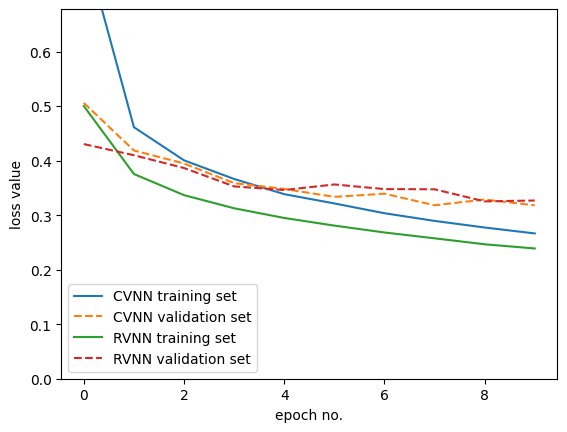

In [27]:
plot_loss_history_comparision(RVMLPNN_history, CVCNN_history)

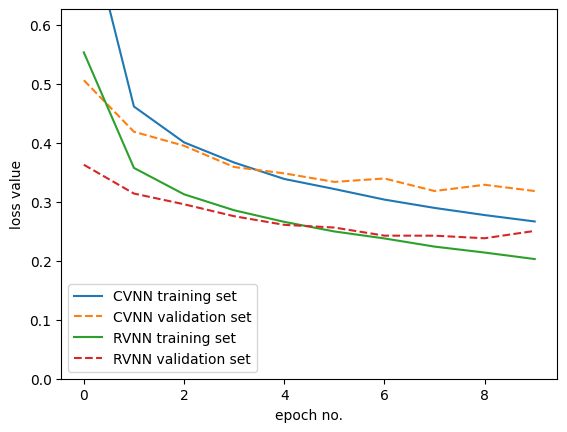

In [28]:
plot_loss_history_comparision(RVCNN_history, CVCNN_history)